## Data Impact (ParrotAi) 
### Tackling a Pandas problem in Python 
prepared by Eliya Masesa

In [1]:
## import some important modules
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
## So, we can now load the dataset and look at some initial rows and data types of the columns:
## Display the data type of each column
data = pd.read_csv('../Data/IPD-Under-5-years-2014.csv')
print ('\n Data Types:')
data.dtypes


 Data Types:


Region                                                  object
diarrhoea, acute(_lt14 days)_ipd                         int64
ear infection,acute_ipd                                float64
afp in ipd_ipd                                         float64
acute glumerulonephritis_ipd                           float64
animal bite (suspected rabies)_ipd                     float64
animal bites(no suspected rabies)_ipd                  float64
anthrax_ipd                                            float64
birth  asphyxia_ipd                                      int64
bronchial  asthma_ipd                                  float64
burn ipd_ipd                                           float64
cardiac  failure_ipd                                   float64
ear infection,chronic_ipd                              float64
congenital  disorders_ipd                                int64
diabetes  mellitus_ipd                                 float64
diarrhea chronic(_gt= 14)_ipd                          

In [3]:
## printing out some first few rows 
data.head()

,Region,"diarrhoea, acute(_lt14 days)_ipd","ear infection,acute_ipd",afp in ipd_ipd,acute glumerulonephritis_ipd,animal bite (suspected rabies)_ipd,animal bites(no suspected rabies)_ipd,anthrax_ipd,birth asphyxia_ipd,bronchial asthma_ipd,...,soil transmitted helminths_ipd,substance abuse_ipd,"hiv infection, symptomatic_ipd",thyroid diseases_ipd,tuberculosis ipd_ipd,typhoid ipd_ipd,upper respiratory infections_ipd,uti_ipd,viral haemorrhagic fevers_ipd,Total Diagnoses
0,Arusha,1771,85.0,393.0,4.0,0.0,17.0,5.0,945,103.0,...,48.0,0.0,127.0,5.0,127.0,128.0,856.0,563.0,0.0,24149
1,Dar Es Salaam,1908,67.0,22.0,18.0,0.0,7.0,4.0,1638,507.0,...,37.0,0.0,200.0,17.0,93.0,196.0,1192.0,976.0,0.0,31688
2,Dodoma,1926,12.0,7.0,0.0,0.0,13.0,4.0,333,88.0,...,84.0,0.0,49.0,3.0,19.0,147.0,361.0,560.0,0.0,18472
3,Geita,1276,41.0,12.0,0.0,0.0,7.0,0.0,38,37.0,...,79.0,0.0,59.0,15.0,22.0,130.0,214.0,868.0,0.0,20059
4,Iringa,949,46.0,21.0,4.0,0.0,22.0,0.0,547,47.0,...,9.0,0.0,59.0,1.0,25.0,18.0,229.0,445.0,0.0,12913


In [4]:
## Checking whether the dataset contains some missings values
##data.isnull() # displaying it as a dataframe
data.isnull().sum()

Region                                                 0
diarrhoea, acute(_lt14 days)_ipd                       0
ear infection,acute_ipd                                1
afp in ipd_ipd                                         1
acute glumerulonephritis_ipd                           1
animal bite (suspected rabies)_ipd                     1
animal bites(no suspected rabies)_ipd                  1
anthrax_ipd                                            1
birth  asphyxia_ipd                                    0
bronchial  asthma_ipd                                  1
burn ipd_ipd                                           1
cardiac  failure_ipd                                   1
ear infection,chronic_ipd                              1
congenital  disorders_ipd                              0
diabetes  mellitus_ipd                                 1
diarrhea chronic(_gt= 14)_ipd                          1
dysentery ipd_ipd                                      1
epilepsy ipd_ipd               

In [5]:
### Alternative
## This package can be used to display whether there is some missing package from your data
import missingno as msno

In [6]:
##msno.bar(df=data)

In [7]:
## handling missing data in all columns that contains some missing values by replacing it with 0 value 
data.fillna(0, axis=1,inplace=True)

In [8]:
data.isnull().sum()

Region                                                 0
diarrhoea, acute(_lt14 days)_ipd                       0
ear infection,acute_ipd                                0
afp in ipd_ipd                                         0
acute glumerulonephritis_ipd                           0
animal bite (suspected rabies)_ipd                     0
animal bites(no suspected rabies)_ipd                  0
anthrax_ipd                                            0
birth  asphyxia_ipd                                    0
bronchial  asthma_ipd                                  0
burn ipd_ipd                                           0
cardiac  failure_ipd                                   0
ear infection,chronic_ipd                              0
congenital  disorders_ipd                              0
diabetes  mellitus_ipd                                 0
diarrhea chronic(_gt= 14)_ipd                          0
dysentery ipd_ipd                                      0
epilepsy ipd_ipd               

In [10]:
## using this last column we are going to which regions have higher incidences and which have lower incidences occured.
data['Total Diagnoses']

0     24149
1     31688
2     18472
3     20059
4     12913
5     69452
6        28
7      5776
8     28094
9     33276
10    14440
11    19761
12    41168
13    30847
14    41719
15    18486
16    41301
17    11759
18    17988
19    10222
20    40177
21    25190
22    16278
23    18701
24    31657
25    49481
Name: Total Diagnoses, dtype: int64

In [12]:
## top 10 regions with large number of incidences
data.nlargest(10, data[['Total Diagnoses']], keep='first')

,Region,"diarrhoea, acute(_lt14 days)_ipd","ear infection,acute_ipd",afp in ipd_ipd,acute glumerulonephritis_ipd,animal bite (suspected rabies)_ipd,animal bites(no suspected rabies)_ipd,anthrax_ipd,birth asphyxia_ipd,bronchial asthma_ipd,...,soil transmitted helminths_ipd,substance abuse_ipd,"hiv infection, symptomatic_ipd",thyroid diseases_ipd,tuberculosis ipd_ipd,typhoid ipd_ipd,upper respiratory infections_ipd,uti_ipd,viral haemorrhagic fevers_ipd,Total Diagnoses
5,Kagera,4534,170.0,12.0,7.0,0.0,100.0,12.0,143,261.0,...,376.0,0.0,82.0,6.0,18.0,221.0,2275.0,3534.0,0.0,69452
25,Tanga,2252,116.0,55.0,7.0,0.0,40.0,1.0,144,230.0,...,63.0,0.0,177.0,8.0,38.0,163.0,1690.0,15103.0,0.0,49481
14,Morogoro,2120,186.0,33.0,11.0,0.0,15.0,0.0,402,141.0,...,308.0,0.0,62.0,6.0,41.0,488.0,747.0,1965.0,0.0,41719
16,Mwanza,2916,102.0,2.0,29.0,0.0,17.0,0.0,131,99.0,...,160.0,0.0,99.0,79.0,72.0,296.0,444.0,2067.0,0.0,41301
12,Mara,2525,117.0,114.0,5.0,0.0,21.0,1.0,71,76.0,...,219.0,0.0,85.0,131.0,60.0,263.0,351.0,2372.0,0.0,41168
20,Ruvuma,2386,48.0,44.0,3.0,0.0,10.0,7.0,436,165.0,...,55.0,0.0,156.0,10.0,47.0,123.0,1224.0,468.0,0.0,40177
9,Kilimanjaro,2583,680.0,6.0,45.0,0.0,11.0,3.0,14,661.0,...,381.0,0.0,158.0,29.0,17.0,12.0,1789.0,1837.0,2.0,33276
1,Dar Es Salaam,1908,67.0,22.0,18.0,0.0,7.0,4.0,1638,507.0,...,37.0,0.0,200.0,17.0,93.0,196.0,1192.0,976.0,0.0,31688
24,Tabora,3262,37.0,142.0,9.0,0.0,12.0,2.0,71,176.0,...,110.0,0.0,59.0,13.0,22.0,34.0,1214.0,503.0,0.0,31657
13,Mbeya,3493,161.0,3.0,4.0,0.0,18.0,1.0,235,173.0,...,103.0,0.0,161.0,11.0,105.0,377.0,935.0,1058.0,0.0,30847


In [13]:
## Regions with smallest number of incidences 
data.nsmallest(5, data[['Total Diagnoses']], keep='first')

,Region,"diarrhoea, acute(_lt14 days)_ipd","ear infection,acute_ipd",afp in ipd_ipd,acute glumerulonephritis_ipd,animal bite (suspected rabies)_ipd,animal bites(no suspected rabies)_ipd,anthrax_ipd,birth asphyxia_ipd,bronchial asthma_ipd,...,soil transmitted helminths_ipd,substance abuse_ipd,"hiv infection, symptomatic_ipd",thyroid diseases_ipd,tuberculosis ipd_ipd,typhoid ipd_ipd,upper respiratory infections_ipd,uti_ipd,viral haemorrhagic fevers_ipd,Total Diagnoses
6,Katavi,2,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28
7,Katavi,538,5.0,0.0,0.0,0.0,0.0,0.0,7,5.0,...,80.0,0.0,5.0,15.0,1.0,11.0,72.0,266.0,0.0,5776
19,Rukwa,1302,3.0,4.0,1.0,0.0,18.0,0.0,20,22.0,...,31.0,0.0,61.0,1.0,15.0,54.0,47.0,190.0,0.0,10222
17,Njombe,1437,17.0,22.0,7.0,0.0,13.0,0.0,56,59.0,...,28.0,0.0,69.0,2.0,14.0,216.0,319.0,355.0,3.0,11759
4,Iringa,949,46.0,21.0,4.0,0.0,22.0,0.0,547,47.0,...,9.0,0.0,59.0,1.0,25.0,18.0,229.0,445.0,0.0,12913


### Data Descriptive

In [15]:
data.describe()

,"diarrhoea, acute(_lt14 days)_ipd","ear infection,acute_ipd",afp in ipd_ipd,acute glumerulonephritis_ipd,animal bite (suspected rabies)_ipd,animal bites(no suspected rabies)_ipd,anthrax_ipd,birth asphyxia_ipd,bronchial asthma_ipd,burn ipd_ipd,...,soil transmitted helminths_ipd,substance abuse_ipd,"hiv infection, symptomatic_ipd",thyroid diseases_ipd,tuberculosis ipd_ipd,typhoid ipd_ipd,upper respiratory infections_ipd,uti_ipd,viral haemorrhagic fevers_ipd,Total Diagnoses
count,26.000000,26.000000,26.000000,26.000000,26.0,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.0,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,1868.961538,84.576923,75.307692,8.038462,0.0,16.961538,5.615385,249.076923,123.923077,223.576923,...,95.538462,0.0,78.076923,16.846154,39.346154,131.115385,641.076923,1457.038462,0.230769,25887.769231
std,1011.055230,134.074061,129.091214,10.493734,0.0,19.700722,18.676353,354.009822,152.825109,139.535278,...,110.582180,0.0,55.234716,28.228627,35.881965,122.066974,597.885736,2903.117186,0.710363,15152.783125
min,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,1276.750000,16.250000,6.250000,1.250000,0.0,7.000000,0.000000,49.250000,39.500000,132.250000,...,21.250000,0.0,42.250000,3.500000,17.250000,28.750000,217.750000,392.500000,0.000000,16705.500000
50%,1907.000000,43.500000,27.500000,4.000000,0.0,13.000000,0.500000,137.000000,64.500000,183.000000,...,52.500000,0.0,61.500000,9.000000,25.000000,111.000000,425.000000,561.500000,0.000000,22104.000000
75%,2352.500000,112.500000,58.000000,10.500000,0.0,18.750000,3.750000,308.500000,159.000000,308.500000,...,108.250000,0.0,101.250000,15.000000,50.000000,187.750000,915.250000,1163.750000,0.000000,32879.000000
max,4534.000000,680.000000,559.000000,45.000000,0.0,100.000000,96.000000,1638.000000,661.000000,528.000000,...,381.000000,0.0,200.000000,131.000000,127.000000,488.000000,2275.000000,15103.000000,3.000000,69452.000000


### First ten diseases with large occurance

In [16]:
### ftd means "first ten diseases with large occurance".
ftd=data.mean().sort_values(ascending=False)[0:11][1:]
ftd

malaria  severe bs +ve_ipd          4076.153846
malaria severe mrdt +ve_ipd         3327.230769
pneumonia, non-severe_ipd           2390.461538
malaria severe  clinical_ipd        2157.884615
diarrhoea, acute(_lt14 days)_ipd    1868.961538
diagnoses, other_ipd                1667.769231
uti_ipd                             1457.038462
pneumonia, severe_ipd               1453.230769
anaemia, severe_ipd                 1216.346154
anaemia,mildmoderate_ipd             980.192308
dtype: float64

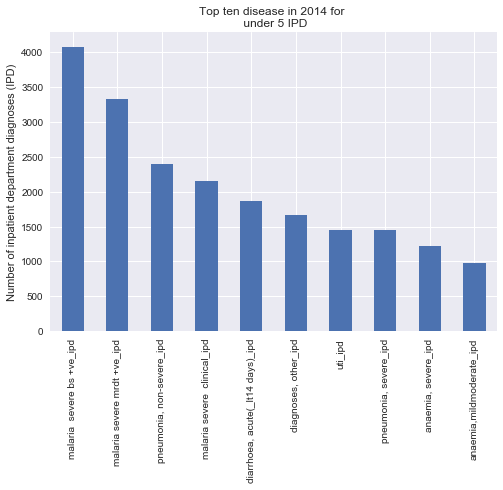

In [17]:
ftd.plot(kind="bar")
plt.title("Top ten disease in 2014 for \n under 5 IPD")
plt.ylabel("Number of inpatient department diagnoses (IPD)")
plt.savefig("../figure/2014_top_ten_disease.png", bbox_inches="tight", dpi=1200)